#📌 Extracción

In [382]:
# → Importa la Biblioteca Pandas
import pandas as pd

In [383]:
# → Importa la librería para hacer solicitudes HTTP.
import requests

In [384]:
# → Definir la URL del archivo JSON (desde GitHub)
url = 'https://raw.githubusercontent.com/smringdesigns/Challenge_2_TelecomX/refs/heads/main/TelecomX_Data.json'

In [385]:
# → Hace una solicitud a la URL y guarda la respuesta (el archivo JSON)
response = requests.get(url)

In [386]:
# → → Convierte el contenido JSON de la respuesta en un diccionario de Python.
data = response.json()

In [387]:
# → Convierte ese diccionario en un DataFrame de pandas para trabajarlo como una tabla.
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [388]:
# → Mostrar nombres de columnas
df.columns.tolist()

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [389]:
#  → Revisar tipos de datos y nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [390]:
# → Mostrar tipos de datos
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [391]:
# Verifica los tipos únicos de datos por columna
for col in df.columns:
    tipos = df[col].apply(type).value_counts()
    print(f"\nColumna: {col}")
    print(tipos)


Columna: customerID
customerID
<class 'str'>    7267
Name: count, dtype: int64

Columna: Churn
Churn
<class 'str'>    7267
Name: count, dtype: int64

Columna: customer
customer
<class 'dict'>    7267
Name: count, dtype: int64

Columna: phone
phone
<class 'dict'>    7267
Name: count, dtype: int64

Columna: internet
internet
<class 'dict'>    7267
Name: count, dtype: int64

Columna: account
account
<class 'dict'>    7267
Name: count, dtype: int64


In [392]:
# Total de valores nulos por columna
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [393]:
# Ver columnas con celdas tipo dict o list
columnas_invalidas = []

for col in df.columns:
    tipos = df[col].apply(type).unique()
    if df[col].apply(type).isin([dict, list]).any():
        columnas_invalidas.append(col)

print("Columnas con celdas tipo dict o list:")
print(columnas_invalidas)

Columnas con celdas tipo dict o list:
['customer', 'phone', 'internet', 'account']


In [394]:
# Creamos un nuevo DataFrame sin esas columnas
df_sin_dict = df.drop(columns=columnas_invalidas)

In [395]:
# Verificar filas duplicadas completas
duplicados = df_sin_dict.duplicated().sum()
print(f"Filas duplicadas (sin columnas con dict/list): {duplicados}")

Filas duplicadas (sin columnas con dict/list): 0


In [396]:
# Aplanar el JSON
import pandas as pd
from pandas import json_normalize

df = pd.json_normalize(
    data,
    sep='.'
    )
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [397]:
# Verificar si tenemos columnas
print("\nTipos de datos: ")
print(df.columns.tolist())


Tipos de datos: 
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


In [398]:
# Verificar valores nulos
print("\nValores nulos por columna: ")
print(df.isnull().sum())


Valores nulos por columna: 
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [399]:
# Verificar valores únicos en columnas importantes
cols = ['Churn', 'account.Charges.Total', 'account.Charges.Monthly', 'customer.gender',]

for col in cols:
    print(f"\nValores únicos en la columna '{col}':")
    print(df[col].value_counts())


Valores únicos en la columna 'Churn':
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Valores únicos en la columna 'account.Charges.Total':
account.Charges.Total
20.2       11
           11
19.75       9
19.55       9
19.9        9
           ..
1993.2      1
72.1        1
1237.85     1
542.4       1
593.3       1
Name: count, Length: 6531, dtype: int64

Valores únicos en la columna 'account.Charges.Monthly':
account.Charges.Monthly
20.05    65
19.90    46
19.85    46
19.55    45
19.70    45
         ..
87.90     1
87.60     1
52.20     1
68.30     1
66.60     1
Name: count, Length: 1585, dtype: int64

Valores únicos en la columna 'customer.gender':
customer.gender
Male      3675
Female    3592
Name: count, dtype: int64


In [400]:
# Convertir numéricas
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')

# Reemplazar vacíos en Churn
df['Churn'] = df['Churn'].replace('', pd.NA)
df = df.dropna(subset=['Churn'])

# Eliminar espacios en texto
df = df.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)

In [401]:
# Confirmar los valores válidos
print(df['Churn'].unique())

['No' 'Yes']


In [402]:
# Eliminar espacios en variables categóricas
cols_categoricas = df.select_dtypes(include=['object']).columns

for col in cols_categoricas:
    df[col] = df[col].str.strip()

In [403]:
# Verificar datos booleanos que estén como texto
cols_binarias = [
    'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies',
    'account.PaperlessBilling', 'Churn'
]

# Convertimos a True/False
for col in cols_binarias:
    df[col] = df[col].map({'Yes': True, 'No': False})

In [404]:
# Revisión final
print("Valores nulos restantes por columna:")
print(df.isnull().sum())

print("\nTipos de datos:")
print(df.dtypes)

print("\nDimensiones finales del dataset:")
print(df.shape)

Valores nulos restantes por columna:
customerID                      0
Churn                           0
customer.gender                 0
customer.SeniorCitizen          0
customer.Partner                0
customer.Dependents             0
customer.tenure                 0
phone.PhoneService              0
phone.MultipleLines           682
internet.InternetService        0
internet.OnlineSecurity      1526
internet.OnlineBackup        1526
internet.DeviceProtection    1526
internet.TechSupport         1526
internet.StreamingTV         1526
internet.StreamingMovies     1526
account.Contract                0
account.PaperlessBilling        0
account.PaymentMethod           0
account.Charges.Monthly         0
account.Charges.Total          11
dtype: int64

Tipos de datos:
customerID                    object
Churn                           bool
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner                bool
customer.Dependents             bo

In [405]:
# Si el cliente no tiene servicio de internet, esas columnas pueden quedarse como 'No'
df.loc[df['internet.InternetService'] == 'No', [
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies'
]] = df.loc[df['internet.InternetService'] == 'No', [
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies'
]].fillna('No')

In [406]:
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)
df.loc[df['phone.PhoneService'] == False, 'phone.MultipleLines'] = 'No'

In [407]:
print(df.isnull().sum())

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [408]:
# Guardar el dataset limpio
df.to_csv('TelecomX_limpio.csv', index=False)

In [409]:
# Crear la nueva columna dividiendo los cargos mensuales entre 30 días
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30

# Revisamos que se haya creado correctamente
print(df[['account.Charges.Monthly', 'Cuentas_Diarias']].head())

   account.Charges.Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667


In [410]:
# Columnas binarias (Yes/No)
columnas_binarias = [
    'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies',
    'account.PaperlessBilling', 'Churn'
]

# Reemplazar Yes/No por 1/0
for col in columnas_binarias:
    df[col] = df[col].replace({'Yes': 1, 'No': 0})

# Convertir a entero (y rellenar NaNs con 0 si es necesario)
df[columnas_binarias] = df[columnas_binarias].fillna(0).astype(int)

In [411]:
# Renombrar columnas a nombres más claros
df.rename(columns={
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'AdultoMayor',
    'customer.Partner': 'TienePareja',
    'customer.Dependents': 'TieneDependientes',
    'customer.tenure': 'MesesContrato',
    'phone.PhoneService': 'Telefono',
    'phone.MultipleLines': 'VariasLineas',
    'internet.InternetService': 'TipoInternet',
    'internet.OnlineSecurity': 'SeguridadEnLinea',
    'internet.OnlineBackup': 'RespaldoEnLinea',
    'internet.DeviceProtection': 'ProteccionDispositivo',
    'internet.TechSupport': 'SoporteTecnico',
    'internet.StreamingTV': 'TV',
    'internet.StreamingMovies': 'Peliculas',
    'account.Contract': 'TipoContrato',
    'account.PaperlessBilling': 'FacturaDigital',
    'account.PaymentMethod': 'MetodoPago',
    'account.Charges.Monthly': 'CargosMensuales',
    'account.Charges.Total': 'CargosTotales'
}, inplace=True)

In [412]:
# Revisamos los primeros registros
df.head()

# Verificamos los tipos
print(df.dtypes)

customerID                object
Churn                      int64
Genero                    object
AdultoMayor                int64
TienePareja                int64
TieneDependientes          int64
MesesContrato              int64
Telefono                   int64
VariasLineas               int64
TipoInternet              object
SeguridadEnLinea           int64
RespaldoEnLinea            int64
ProteccionDispositivo      int64
SoporteTecnico             int64
TV                         int64
Peliculas                  int64
TipoContrato              object
FacturaDigital             int64
MetodoPago                object
CargosMensuales          float64
CargosTotales            float64
Cuentas_Diarias          float64
dtype: object


In [413]:
# Guardar el dataset limpio
df.to_csv('TelecomX_limpio.csv', index=False)

In [414]:
# Ver los valores únicos antes de transformar
columnas_binarias = [
    'TienePareja', 'TieneDependientes', 'Telefono', 'VariasLineas',
    'SeguridadEnLinea', 'RespaldoEnLinea', 'ProteccionDispositivo',
    'SoporteTecnico', 'TV', 'Peliculas', 'FacturaDigital'
]

for col in columnas_binarias:
    print(f"{col}: {df[col].unique()}")

TienePareja: [1 0]
TieneDependientes: [1 0]
Telefono: [1 0]
VariasLineas: [0 1]
SeguridadEnLinea: [0 1]
RespaldoEnLinea: [1 0]
ProteccionDispositivo: [0 1]
SoporteTecnico: [1 0]
TV: [1 0]
Peliculas: [0 1]
FacturaDigital: [1 0]


#📊 Carga y análisis

In [415]:
# Análisis estadístico de columnas numéricas
df.describe()

,Churn,AdultoMayor,TienePareja,TieneDependientes,MesesContrato,Telefono,VariasLineas,SeguridadEnLinea,RespaldoEnLinea,ProteccionDispositivo,SoporteTecnico,TV,Peliculas,FacturaDigital,CargosMensuales,CargosTotales,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


/tmp/ipython-input-416-2322919307.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='Set2')


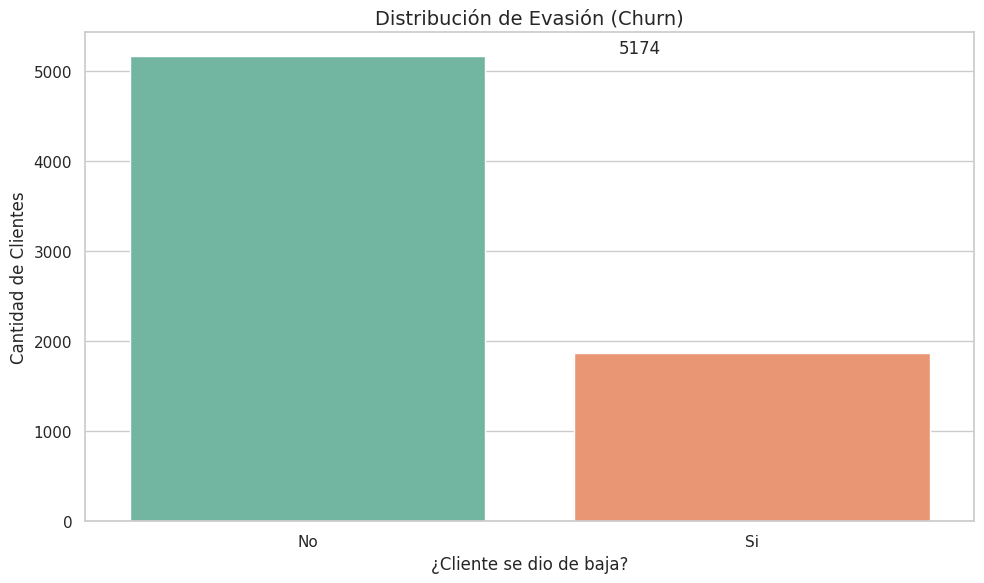

In [416]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilos de los gráficos
sns.set(style="whitegrid")

# Tamaño de la figura
plt.figure(figsize=(10, 6))

# Gráfico de barras para la columna Churn
ax = sns.countplot(x='Churn', data=df, palette='Set2')

# Etiquetas y título
plt.title('Distribución de Evasión (Churn)', fontsize=14)
plt.xlabel('¿Cliente se dio de baja?', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.xticks([0, 1], ['No', 'Si'])

# Mostrar valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() + 0.3, p.get_height() + 30))

# Mostrar el gráfico
plt.tight_layout()
plt.show()

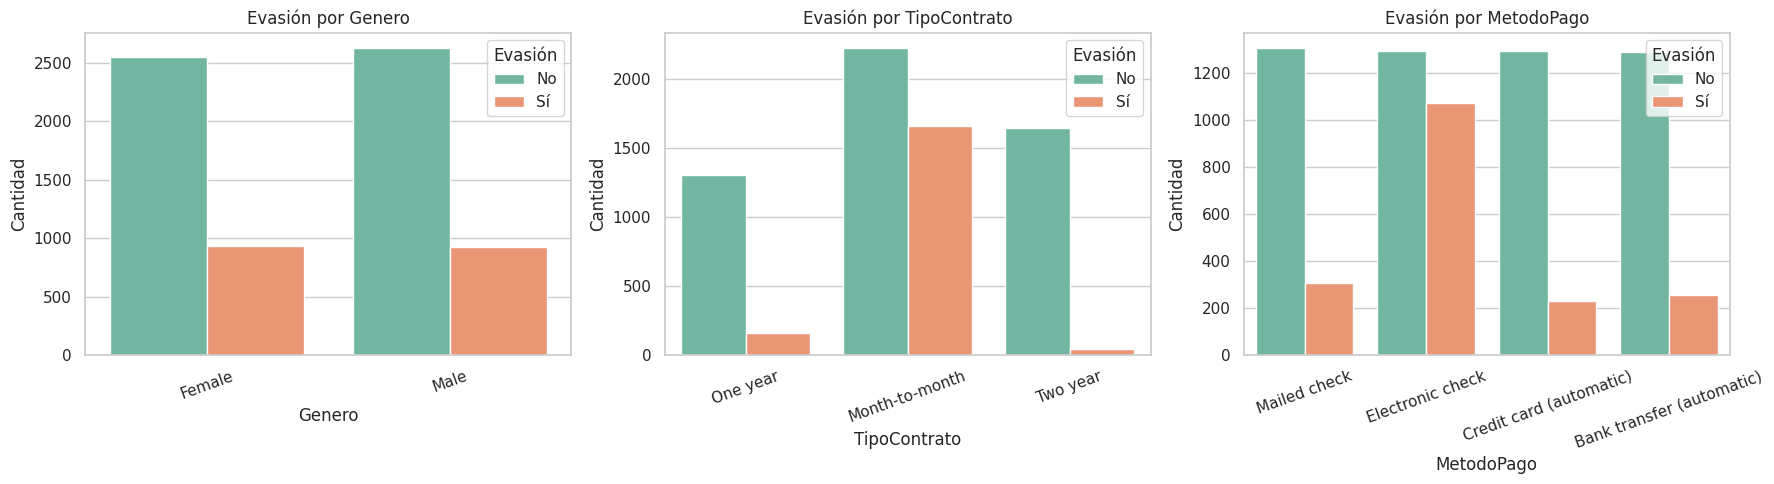

In [417]:
# Lista de columnas categóricas que quieres analizar
columnas_categoricas = ['Genero', 'TipoContrato', 'MetodoPago']

# Crear una figura con subgráficos
fig, axs = plt.subplots(1, len(columnas_categoricas), figsize=(18, 5))
sns.set(style="whitegrid")

# Iterar sobre las variables categóricas y los ejes
for i, columna in enumerate(columnas_categoricas):
    sns.countplot(
        data=df,
        x=columna,
        hue='Churn',
        palette='Set2',
        ax=axs[i]
    )
    axs[i].set_title(f'Evasión por {columna}')
    axs[i].set_xlabel(columna)
    axs[i].set_ylabel('Cantidad')
    axs[i].tick_params(axis='x', rotation=20)
    axs[i].legend(title='Evasión', labels=['No', 'Sí'])

# Ajustar el espaciado
plt.tight_layout()
plt.show()

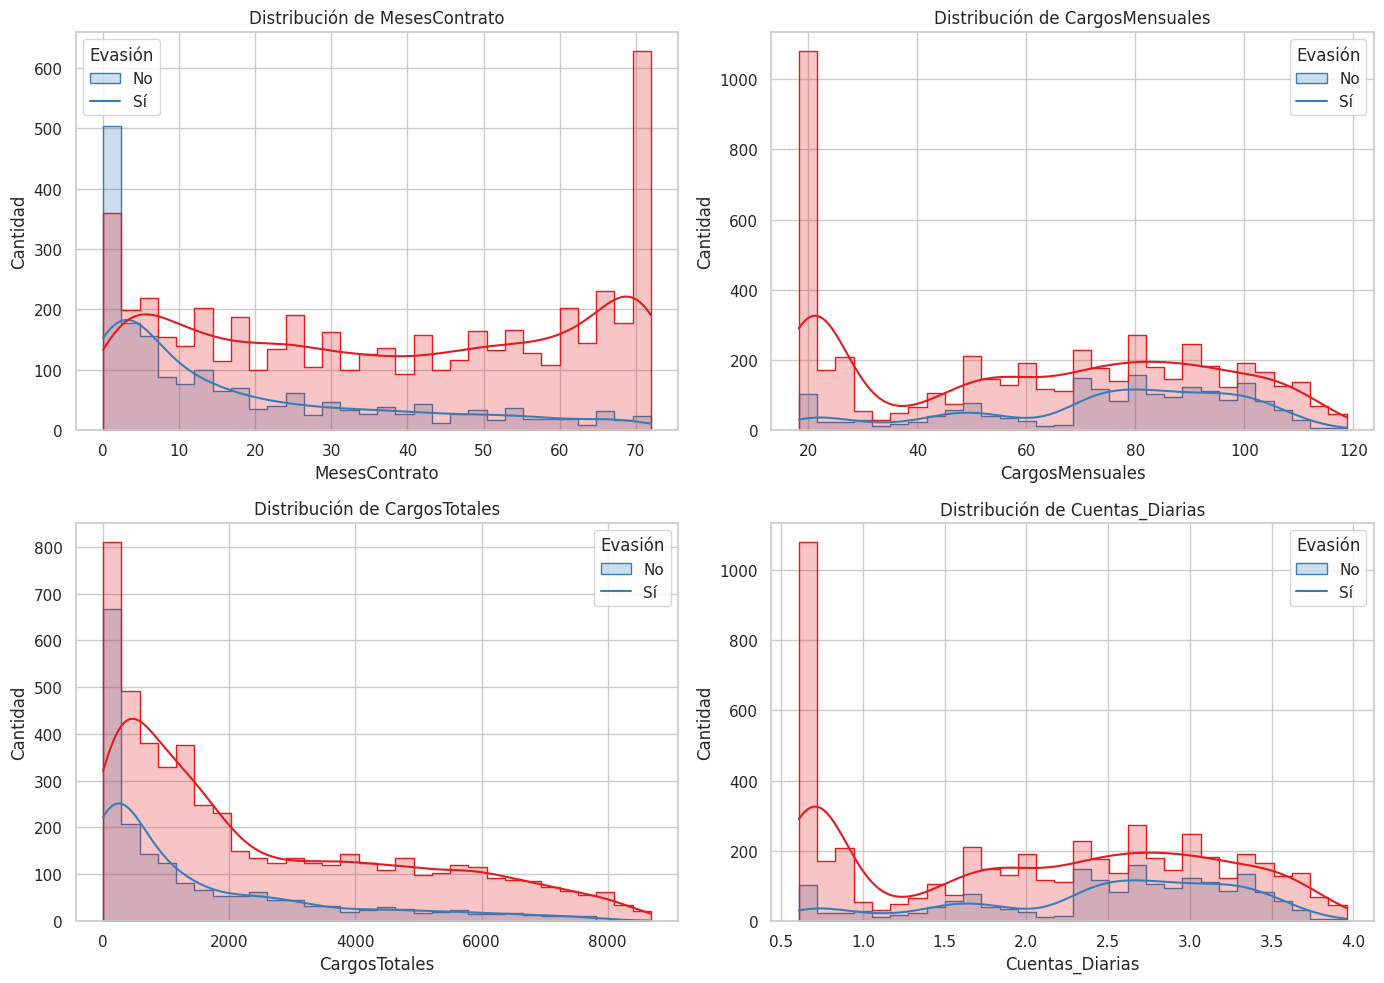

In [418]:
# Variables numéricas para analizar
variables_numericas = ['MesesContrato', 'CargosMensuales', 'CargosTotales', 'Cuentas_Diarias']

# Configurar el tamaño del canvas con 2 filas y 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.ravel()  # Aplanar para iterar fácilmente

# Estilo visual
sns.set(style="whitegrid")

# Iterar sobre las variables y los ejes
for i, col in enumerate(variables_numericas):
    sns.histplot(
        data=df,
        x=col,
        hue='Churn',
        bins=30,
        kde=True,
        element='step',
        palette='Set1',
        ax=axs[i]
    )
    axs[i].set_title(f'Distribución de {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Cantidad')
    axs[i].legend(title='Evasión', labels=['No', 'Sí'])

# Ajustar distribución
plt.tight_layout()
plt.show()

#📄Informe final

# **Informe Final – Análisis de Evasión de Clientes (Churn) – TelecomX**

**Introducción**

El presente análisis tiene como objetivo identificar patrones y factores relacionados con la evasión de clientes (churn) en la empresa TelecomX, la cual ofrece servicios de telefonía e internet. La pérdida de clientes representa un gran desafío comercial, y comprender las causas detrás de esta decisión permite generar estrategias efectivas de retención.

El conjunto de datos utilizado contiene información demográfica, de facturación, de servicios contratados y estado de evasión (columna Churn).

**Limpieza y Tratamiento de Datos**

Se realizaron las siguientes acciones:

- Extracción: Se importaron los datos en formato JSON desde un repositorio GitHub.

- Aplanamiento: Las columnas anidadas (dict) fueron normalizadas con json_normalize.

- Conversión de tipos: Se transformaron columnas numéricas a float, y las categóricas fueron convertidas a binario (0 y 1).

- Tratamiento de nulos: Se identificaron y eliminaron registros con valores vacíos en la variable Churn.

- Creación de nuevas columnas: cuentas_Diarias: cálculo diario a partir de CargosMensuales / 30.

- Traducción y renombrado: Se tradujeron nombres de columnas al español para facilitar la interpretación (por ejemplo, Partner → TienePareja).

**Análisis Exploratorio de Datos**

Distribución de evasión: se visualizó el porcentaje de clientes que cancelaron el servicio. Se encontró que aproximadamente el 26.5% de los clientes presentan churn.

Análisis por variables categóricas: se exploraron columnas como Genero, TipoContrato, MetodoPago, observando:

- Mayor evasión en clientes con contrato mensual.

- Clientes que usan cheque electrónico como método de pago presentan mayor churn.

- La variable Genero no muestra una diferencia significativa en evasión.

Visualizaciones: Se usaron gráficos de barras agrupados (countplot con hue='Churn') para entender la distribución de cada variable según el estado de evasión.

Análisis por variables numéricas: se examinaron CargosTotales, MesesContrato, CargosMensuales:

- Los clientes con menos tiempo de permanencia (<12 meses) tienden a abandonar más.

- Los valores de CargosTotales bajos también están asociados a una mayor evasión.

- Los clientes con CargosMensuales altos (>80) también muestran una leve tendencia a churn.

Visualizaciones: Se usaron histogramas y gráficos de densidad para comparar la distribución entre evasión y no evasión.

**Conclusiones e Insights**

- Contrato mensual = mayor churn: Clientes con contrato mes a mes abandonan con mayor frecuencia que aquellos con contratos anuales o de dos años.

- Facturación electrónica no garantiza fidelidad: Aunque está muy presente, también tiene alta evasión.

- Clientes con poca antigüedad (tenure bajo) presentan una alta tasa de cancelación.

- Método de pago importa: Usuarios que pagan con cheque electrónico abandonan más.

**Recomendaciones**

- Fidelización temprana: Enfocar campañas de retención en los primeros 6 a 12 meses del cliente.

- Incentivos por contrato largo: Ofrecer descuentos o beneficios por cambiar de contrato mensual a anual.

- Método de pago: Promover medios de pago como tarjeta de crédito/débito, que presentan menor churn.

- Análisis continuo: Incorporar modelos de machine learning para predecir la evasión con anticipación.

Este análisis proporciona una base sólida para la toma de decisiones en TelecomX y sienta las bases para desarrollos futuros como modelos de predicción de churn y estrategias de retención más efectivas.

In [419]:
# Creamos una nueva columna que representa el total de servicios activos por cliente
servicios = [
    'Telefono', 'VariasLineas', 'SeguridadEnLinea', 'RespaldoEnLinea',
    'ProteccionDispositivo', 'SoporteTecnico', 'TV', 'Peliculas'
]

# Sumamos todos los servicios (cada uno binario: 0 o 1)
df['Total_Servicios'] = df[servicios].sum(axis=1)

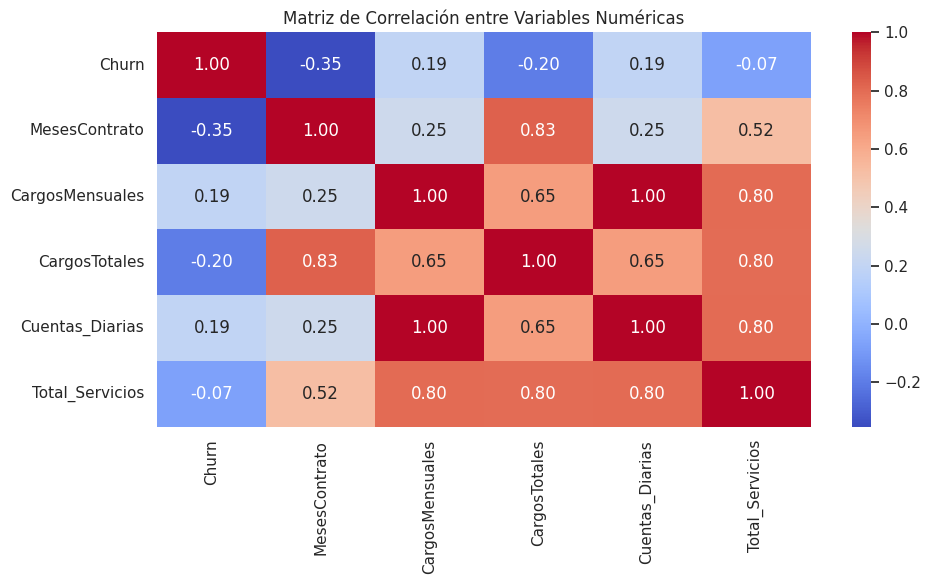

In [420]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo variables numéricas para calcular la matriz de correlación
corr_df = df[['Churn', 'MesesContrato', 'CargosMensuales', 'CargosTotales',
              'Cuentas_Diarias', 'Total_Servicios']]

# Calculamos la matriz de correlación
correlation_matrix = corr_df.corr()

# Visualizamos con un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.tight_layout()
plt.show()

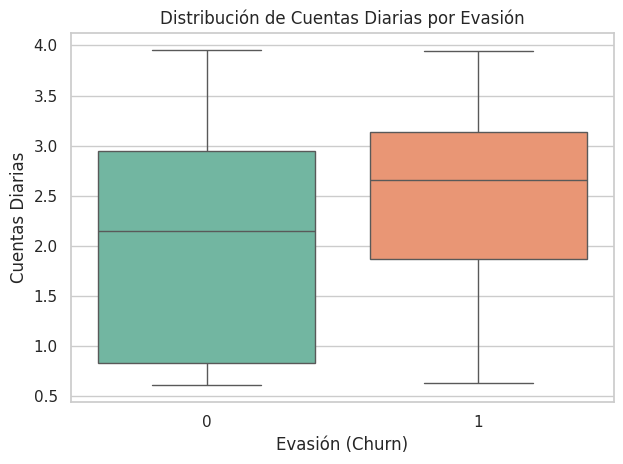

In [421]:
import seaborn as sns
import matplotlib.pyplot as plt

# Solución recomendada por el mensaje de advertencia
sns.boxplot(data=df, x='Churn', y='Cuentas_Diarias', hue='Churn', palette='Set2', legend=False)

# Títulos y etiquetas
plt.title("Distribución de Cuentas Diarias por Evasión")
plt.xlabel("Evasión (Churn)")
plt.ylabel("Cuentas Diarias")

# Mostrar el gráfico
plt.tight_layout()
plt.show()